In [1]:
%autosave 0

Autosave disabled


In [2]:
from sklearn import datasets

In [29]:
faces = datasets.fetch_olivetti_faces()

In [5]:
type(faces)

sklearn.utils.Bunch

In [6]:
faces.images.shape

(400, 64, 64)

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

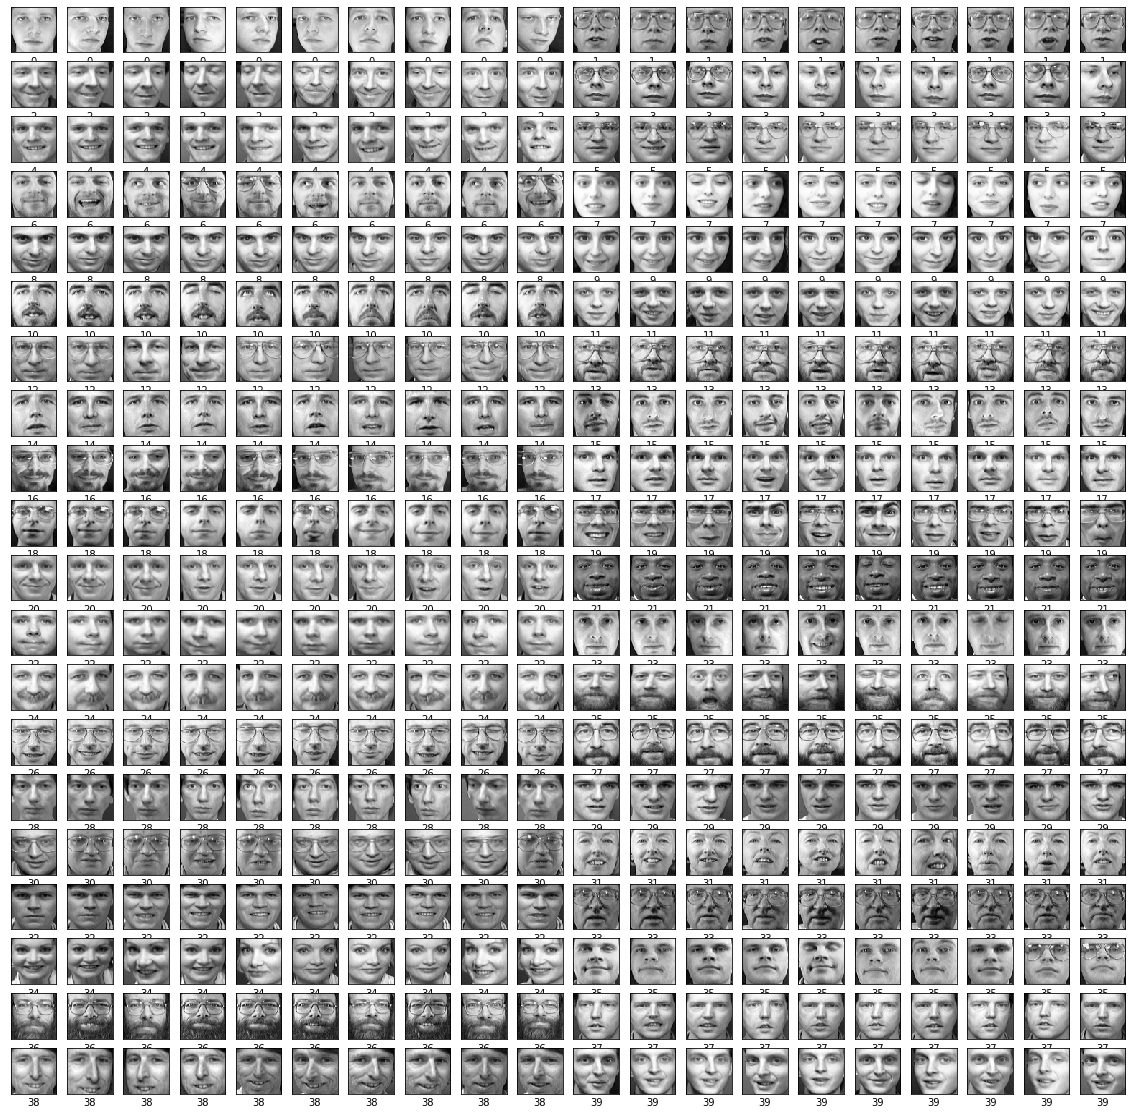

In [9]:
i = 0
plt.figure(figsize=(20,20))
for img in faces.images:
    plt.subplot(20,20,i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(faces.target[i])
    i += 1
plt.show()

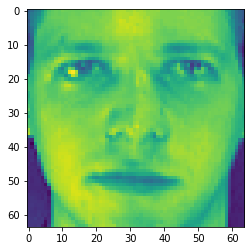

In [11]:
plt.imshow(faces.images[0])

In [12]:
faces.target[0]

0

In [15]:
X = faces.images
y = faces.target

In [16]:
X[0]

array([[0.30991736, 0.3677686 , 0.41735536, ..., 0.37190083, 0.3305785 ,
        0.30578512],
       [0.3429752 , 0.40495867, 0.43801653, ..., 0.37190083, 0.338843  ,
        0.3140496 ],
       [0.3429752 , 0.41735536, 0.45041323, ..., 0.38016528, 0.338843  ,
        0.29752067],
       ...,
       [0.21487603, 0.20661157, 0.2231405 , ..., 0.15289256, 0.16528925,
        0.17355372],
       [0.20247933, 0.2107438 , 0.2107438 , ..., 0.14876033, 0.16115703,
        0.16528925],
       [0.20247933, 0.20661157, 0.20247933, ..., 0.15289256, 0.16115703,
        0.1570248 ]], dtype=float32)

In [17]:
y[0]

0

In [18]:
X = X.reshape(400, 64, 64, 1)

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
import tensorflow.keras as keras

In [23]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(128,
                            kernel_size=3,
                            activation='relu',
                            input_shape=(64,64,1)))
model.add(keras.layers.Conv2D(64,
                            kernel_size=3,
                            activation='relu'))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(40,
                            activation='softmax'))
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

In [24]:
model.fit(X_train, y_train, epochs=5)

Train on 280 samples
Epoch 1/5
280/280 [==============================] - 12s 44ms/sample - loss: 4.8170 - acc: 0.0393
Epoch 2/5
280/280 [==============================] - 11s 40ms/sample - loss: 3.6884 - acc: 0.0536
Epoch 3/5
280/280 [==============================] - 12s 43ms/sample - loss: 3.6884 - acc: 0.0357
Epoch 4/5
280/280 [==============================] - 13s 45ms/sample - loss: 3.6876 - acc: 0.0464
Epoch 5/5
280/280 [==============================] - 12s 43ms/sample - loss: 3.6854 - acc: 0.0643


In [25]:
y_pred = model.predict(X_test)

In [27]:
import numpy as np

In [28]:
print(y_test[0], np.argmax(y_pred[0]))

12 20
